# 1. [Re] [Deep Convolution Neural Network and Autoencoders-Based Unsupervised Feature Learning of EEG Signals](https://doi.org/10.1109/ACCESS.2018.2833746)

---

## 1.1 Reproduction authors.

We have no affiliation with the original authors, and in the attempts to contact there was no return.


[Bruno Aristimunha](https://github.com/bruAristimunha)*<sup>1</sup>, [Diogo Eduardo Lima Alves](https://github.com/DiogoEduardo)*<sup>1</sup>, [Walter Hugo Lopez Pinaya](https://github.com/warvito) <sup>1</sup>, [Raphael Y. de Camargo](https://rycamargo.wixsite.com) <sup>1</sup>

> <sup>1</sup> Center for Mathematics, Computation and Cognition (CMCC), Federal Univesity of ABC (UFABC), Street Arcturus, 03. District Jardim Antares, São Bernardo do Campo, CEP 09606-070, SP, Brazil.

*b.aristimunha@gmail.com, digmogle96@gmail.com

---

## 1.2 Original authors.

Tingxi Wen <sup>2</sup>, Zhongnan Zhang* <sup>2</sup>

> <sup>2</sup> Software School, Xiamen University, Xiamen, China.

*zhongnan_zhang@xmu.edu.cn

# 2. Abstract (text)

This paper describes our efforts to implement, acquire similar results and improvement of the ones achieved by the authors of article. We follow the steps and models described in their article and the same public data sets of EEG Signals. Epilepsy affects more than 65 million people globally and EEG Signals are very important to analyze and recognize epilepsy. Although the efforts in the last years it is still very difficult to extract useful information from this signals and select useful features from numerous them in diagnostic application. We construct a deep convolution network and autoencoders-based model (AE-CDNN) in order to perform unsupervised feature learning. We use the AE-CDNN to extract the features of the available data sets, and then we use some common classifiers to classify the features. The results obtained demonstrate that the proposed AE-CDNNN to perform the traditional feature extraction based classification techniques by achieving better accuracy of classification.

Keywords: Reproduction, Epilepsy, Auto-Enconder, EEG.

---

Responsible for the reproduction of the results: [Bruno Aristimunha](https://github.com/bruAristimunha) and [Diogo Eduardo Lima Alves](https://github.com/DiogoEduardo).

The goals in the work is:
    - Make a reproducible report of the results previously reported;
    - Improve and deepen the analyzes already carried out in the original article;


Advisors: [Walter Hugo Lopez Pinaya](https://github.com/warvito) and [Raphael Y. de Camargo](https://rycamargo.wixsite.com/home) 

***

This work follows the structure below: 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Re]-Deep-Convolution-Neural-Network-and-Autoencoders-Based-Unsupervised-Feature-Learning-of-EEG-Signals" data-toc-modified-id="1.-[Re]-Deep-Convolution-Neural-Network-and-Autoencoders-Based-Unsupervised-Feature-Learning-of-EEG-Signals-1">1. [Re] <a href="https://doi.org/10.1109/ACCESS.2018.2833746" target="_blank">Deep Convolution Neural Network and Autoencoders-Based Unsupervised Feature Learning of EEG Signals</a></a></span><ul class="toc-item"><li><span><a href="#1.1-Reproduction-authors." data-toc-modified-id="1.1-Reproduction-authors.-1.1">1.1 Reproduction authors.</a></span></li><li><span><a href="#1.2-Original-authors." data-toc-modified-id="1.2-Original-authors.-1.2">1.2 Original authors.</a></span></li></ul></li><li><span><a href="#2.-Abstract-(text)" data-toc-modified-id="2.-Abstract-(text)-2">2. Abstract (text)</a></span></li><li><span><a href="#3.-Imports-Packages-(code)" data-toc-modified-id="3.-Imports-Packages-(code)-3">3. Imports Packages (code)</a></span></li><li><span><a href="#4.-Introduction-(text):" data-toc-modified-id="4.-Introduction-(text):-4">4. Introduction (text):</a></span></li><li><span><a href="#5.-Related-Work-(text)-" data-toc-modified-id="5.-Related-Work-(text)--5">5. Related Work (text) <a name="related"></a></a></span></li><li><span><a href="#6.-Methodology-Proposal-(text-and-code)-" data-toc-modified-id="6.-Methodology-Proposal-(text-and-code)--6">6. Methodology Proposal (text and code) <a name="propose"></a></a></span><ul class="toc-item"><li><span><a href="#6.1-Implementation-Details-(text)" data-toc-modified-id="6.1-Implementation-Details-(text)-6.1">6.1 Implementation Details (text)</a></span></li><li><span><a href="#6.2-Autoencoders" data-toc-modified-id="6.2-Autoencoders-6.2">6.2 Autoencoders</a></span></li><li><span><a href="#6.3-Feature-Learning-Model" data-toc-modified-id="6.3-Feature-Learning-Model-6.3">6.3 Feature Learning Model</a></span></li><li><span><a href="#6.4-Classification" data-toc-modified-id="6.4-Classification-6.4">6.4 Classification</a></span></li></ul></li><li><span><a href="#7.-Experimental-Methodology-" data-toc-modified-id="7.-Experimental-Methodology--7">7. Experimental Methodology <a name="metho"></a></a></span><ul class="toc-item"><li><span><a href="#7.1-Bonn-University-EEG-database" data-toc-modified-id="7.1-Bonn-University-EEG-database-7.1">7.1 Bonn University EEG database</a></span><ul class="toc-item"><li><span><a href="#7.1.1-Performance-Measures" data-toc-modified-id="7.1.1-Performance-Measures-7.1.1">7.1.1 Performance Measures</a></span><ul class="toc-item"><li><span><a href="#Table-1.-Metrics-and-Definition-use-in-our-paper.-Only-the-Acurracy-was-considered-in-\cite{WenZha}.-" data-toc-modified-id="Table-1.-Metrics-and-Definition-use-in-our-paper.-Only-the-Acurracy-was-considered-in-\cite{WenZha}.--7.1.1.1">Table 1. Metrics and Definition use in our paper. Only the Acurracy was considered in \cite{WenZha}. <a name="table1"></a></a></span></li></ul></li><li><span><a href="#7.2.1-Download-Data-(code)" data-toc-modified-id="7.2.1-Download-Data-(code)-7.1.2">7.2.1 Download Data (code)</a></span></li><li><span><a href="#7.2.2-Split-data-and-pre-processing-(code)" data-toc-modified-id="7.2.2-Split-data-and-pre-processing-(code)-7.1.3">7.2.2 Split data and pre-processing (code)</a></span></li><li><span><a href="#7.2.3-Building-and-saving-feature-learning-(code)" data-toc-modified-id="7.2.3-Building-and-saving-feature-learning-(code)-7.1.4">7.2.3 Building and saving feature learning (code)</a></span></li><li><span><a href="#7.2.4-Classification-process-(code)-." data-toc-modified-id="7.2.4-Classification-process-(code)-.-7.1.5">7.2.4 Classification process (code) .</a></span></li><li><span><a href="#7.2.5-Metrics-evaluation-(code)" data-toc-modified-id="7.2.5-Metrics-evaluation-(code)-7.1.6">7.2.5 Metrics evaluation (code)</a></span></li></ul></li></ul></li><li><span><a href="#8.-Results-and-Discussion-" data-toc-modified-id="8.-Results-and-Discussion--8">8. Results and Discussion <a name="resu"></a></a></span></li><li><span><a href="#9.-Conclusion-" data-toc-modified-id="9.-Conclusion--9">9. Conclusion <a name="concl"></a></a></span></li><li><span><a href="#References" data-toc-modified-id="References-10">References</a></span></li></ul></div>

# 3. Imports Packages (code)

Imports packages which are used by jupyter paper.

In [1]:
import matplotlib.pyplot as plt
from baycomp import two_on_multiple
import seaborn as sns
plt.style.use('ggplot')

In [2]:
import sys

sys.path.append("../code")

from data_management import *
from classification import *

# 4. Introduction (text):

Epilepsy is a chronic neurological disorder and it is becoming one of the most common neurological diseases in the world. Approximately $1\%$ of world's population is affected by epilepsy representing more than 65 million people affected. This disorder is characterized by the occurrence of spontaneous convulsions due to the abnormal synchronous firing of the cortical neurons. This physical reaction can generate many problems to patients, including physical harm caused by the loss of consciousness, shame and discrimination.

Frequent seizures are dangerous conditions because, at the moment of disruption of the body can occur falls, fractures, burns, car accidents, and other serious physical injuries. Epilepsy can be defined as a permanent predisposition in the brain to cause epileptic seizures.

A person is diagnosed with epilepsy if they have two unprovoked seizures (or one unprovoked seizure with the likelihood of more) that were not caused by some known and reversible medical condition like alcohol withdrawal or extremely low blood sugar. Even when correctly diagnosed and treated, the epileptic patient still suffers side effects and sporadic seizures. The epileptic seizures can cause even irreversible damage to brain, then we can visualize the importance of analyzing epilepsy to improve the life quality and the medical treatments for these patients.

To confirm the diagnostic, epileptologists should usually visually inspect the long-term electroencephalograms of the scalp (EEG). Electroencephalogram (EEG) is a measure of the voltage fluctuation generated by the ion current of neurons in the brain, which reflects the activity of the brain’s bio-electricity and may contain many physiological and disease information. 

When it was discovered that during a patient's seizure the brain activity changes the EEG has become the most common epilepsy diagnostic tool. Many studies have been made and the general problem consists in acquiring methods to efficiently classify the patients' EEG signals. 

However, this costly task still presents several challenges for automatic crisis detection, among them: The scarce number of public data sets; The lack of standardization in seizure classification methodologies; The lack of standardization of data preprocessing; The cost of a specialist to label time intervals; The unbalance of the time series given the rare occurrence of the event; The difficulty of reproducing the works in the literature.

With this problem in hand, this paper reproduces the results obtained in <a id="ref-1" href="#cite-WenZha">Wen and Zhang 2018</a>, with public data labeled and preprocessed. In addition, we get new results by combining the proposal classifiers into a classifier by set voting, and we add new metrics.

The remainder of this paper is organized as follows: Section [5](#related) presents few works related to classification of epileptic seizures in EGG. Section [6](#propose) introduce the methodological proposal employed, and their differences with the work of [WenZha](https://doi.org/10.1109/ACCESS.2018.2833746). Section [7](#metho) lists the experimental validation process using epilepsy datasets. Section [8](#resu) presents the corresponding results and analyzes our approach. Finally, Conclusions were summarized in Section [9](#concl).

# 5. Related Work (text) <a name="related"></a>

Several papers use automated methods for detecting seizures. We can extract several discriminative characteristics of the signals, among them, we mention the autocorrelation, probability of synchronization, functional connectivity network properties, EEG morphology and the reconstructed powers of the time series. 

The oscillatory characteristics present in the time series of patients with epilepsy were extensively studied by temporal frequency analysis for classification $\cite{saab2005system,kuhlmann2009seizure,shoeb2004patient,shoeb2011machine}$. Using this technique, we mention the Discrete Wavelet Transform (DWT), which, despite requiring hand-designed parameters, it is the most used $\cite{ullah2018automated}$.

In the literature, there is no common rule for manually label seizures in databases, which makes it difficult to compare the results of these methods. Besides the few papers that use the same sets, there are few that are looking for the same task.


In $\cite{chua2011application}$ it is used High Order Spectra (HOS) and spectrum-based energy resources for the automated detection of epilepsy. The proposed method yields good results when using Gaussian Mixture (GMM) for classification ($93.11\%$ and $88.78\%$). In $\cite{nicolaou2012detection}$ we have that the authors extracted the entropy of the permutation of the signals, and employed these in an SVM for classification. The result of this methodology, acquired $93.55\%$ for our first database, in task A vs E.

Some researchers have applied deep belief networks (DBNs) to the detection of seizures $\cite{acharya2018deep}$. In the line of deep learning algorithms, CNNs attract a growing interest in the literature. In $\cite{hussein2018epileptic}$ they propose a CNN that learns based on the spectral information of each channel and a LSTM network with a single layer to classify the channels of the objects. 

$\cite{xun2016detecting}$ propose an approach unusual when decoding each window of possible interval as an ``EGG word`` from the `EEG` dictionary. They explore temporal knowledge by learning context information from EEG fragments (Context-EEG). The authors obtained a $22.93\%$ error rate in the control classification vs epileptic crisis using the second dataset present in $\cite{WenZha}$. 

$\cite{emami2019autoencoding}$ obtained $100\%$ sensitivity with a simpler methodology than our. For each channel, it builds a autoencoder and through the error of reconstruction is classified. The dataset was self and with no access available. The $\cite{ullah2018automated}$ propose a pyramidal model of one dimension for convolution (P-1D-CNN). The method obtains $99.1 $\pm$ 0.9$ in our first dataset.

# 6. Methodology Proposal (text and code) <a name="propose"></a>

In this section we describe implementation details, since the core here is the reproducible aspect of our reference article. We introduce the idea and implementation of autoencoder/feature learning and our version of the model in $\cite{WenZha}$, explaining the differences we have made to the original model.

From the long methodology, we keep the autoencoder and feature learning as proposed. However, in the classification, we no longer consider classifiers individually, these methods now make up a large ensemble learning classifier, which decides by majority vote the object class.

## 6.1 Implementation Details (text)

We decided to reproduce the implementation described in the article using Keras $\cite{chollet2018keras}$ and back-end in TensorFlow $\cite{tensorflow}$. Our repository includes the list of all the required libraries employed in acquiring the datasets and running the model (the original and the proposed one). According to the methodology proposed in $\cite{Fuente:2019}$ we store all the checkpoints for the trained models, for reproduction purposes. Besides that, the training logs can be visualized using TensorBoard tool.

Given the lack of information about implementation in the original paper, some assumptions or cuts are made: 

* The number of epoch in the auto-enconder is assumed to be $5000$; 
* The number of samples per batch size is assumed to be $500$, due our time constraint; 
* A column of the first database is removed, there is disagreement in the literature on the total instances, $4097$ or $4096$. In the specific database we use there is $4097$. The removed attribute is at the endpoint of each object; 
* The classifier presented in the final subsection was not reproduced for lack of information; 
* The loss function presented in equation $12$ of the \cite{WenZha} was not implemented given the complexity in the chosen library; 
* The value of the seeds selected in all classifiers was $42$; 
* The percent in train-test was $80\%-20\%$; 
* The test data were used for validation in Auto-Enconder;

The experiments were performed using a CPU with Intel Core i7-5930K with 3.50 GHz and two GPUs: Nvidia Quadro K5200 and GeForce GTX 970. Some experiments were also run using Nvidia Titan X.

In [3]:
#Código para mostrar qual máquina foi rodada.
TEST_SIZE = 0.2
EPOCHS = 5000
BATCH = 500
PATH_BOON = '../data/boon/'


In [4]:
%load_ext watermark
%watermark 

2020-03-03T00:24:02-03:00

CPython 3.7.5
IPython 7.10.2

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-40-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## 6.2 Autoencoders

The autoencoder implemented is a specific case of neural network structure. It is formed by three layers, the input layer, output layer and a hidden layer. The training is done in order to set the weights of hidden layer to force the input layer and output layer to be as close to each other as possible. Our features are extracted from the hidden layer, which reduces the dimension of data.

Therefore we have a	 encoding process and a decoding process and we obtain the hidden layer $h$ by applying the encoding function:

\begin{equation}
h = encoder(x) = g(W*x+b),
\end{equation}
where $W$ is the weight matrix between input layer and hidden layer. In the decoding function the hidden layer $h$ is the input and $y = decoder(h)$ as output, the function is defined as follows:

\begin{equation}
y = decoder(x) = g(W'*x + b'),
\end{equation}
where $W'$ is the weight matrix between hidden layer and output layer. Since we want input and output to be as close as possible, we have the object function for the model training process:
$$\min \sum |y^{(i)} - x^{(i)}|,$$
where $y^{(i)}$ is the output signal and $x^{(i)}$ is the input signal.

## 6.3 Feature Learning Model

In this subsection, in order to be brief we will omit equations and minor details, for complete information read \cite{WenZha,Shoeb,emami2019autoencoding}. Since we have the dimension reduced by autoencoder we focus on the next challenge: how to obtain effective features from EEG signals.  The AE-CDNN implemented follows the steps:


    Encoder: sample input, convolution layer, down-sampling layer, reshape operation, full connection layer, and the feature coding.
    Decoder: feature coding as input, full connection layer, reshape operation, deconvolution layer, up-sampling layer and the reconstruction samples.

Basically, the convolution layer acts as our feature extractor. It performs many successive convolution calculations of the input data and the expectation is to maintain the main components of the input data. The pooling layer is a down-sampling method which reduces data dimension. It uses windows to slid and extract the feature maps. These intervals do not overlap each other and with then we obtain the pooled feature maps. The feature sizes tested were $m = 2,4,8,16,32,64,128,256$[<sup>1</sup>](#fn1 "footnote 1")



The convolution and pooling operations can be iterated multiple times. Reshape operation uses the pooled feature maps to construct a one-dimension vector and full connection layer transform this one-dimension vector. 

Considering $x$ as the input and $y$ as the output, now we need to re-transform the one-dimension vector which will generate the $y$ output, recall we want to minimize the difference between $x$ and $y$, we have the following equation to calculate loss:

$$\text{Loss }= \sum_{i=1}^N |x^{(i)} - y^{(i)}|/N .$$


---

<span id="fn1"> Size $m = 256$ has not been tested in \cite{WenZha}</span>

## 6.4 Classification

Since we have extracted the features with reduced dimension we use supervised learning models on these features in order to classify the EEG signals. We avail each classifier and then we compare the results obtained with each one. The classical classifiers  used are: K-Nearest Neighbors (K-NN), Support-Vector Machine - Linear Kernel and Radial Basis kernel (SVM1, SVM2), Decision Tree (DT), Random Forest (RT), Multilayer Neural Network (MLP), Adaptive Boosting algorithm (ADB) and  Gaussian Naive Bayesian (GNB).
 
The proposed modification combines these classifiers, and creates a single classifier that decides by voting. In short, the classifiers were combined by ensemble learning, and the result of the classification became the classification most voted by the classifiers.

# 7. Experimental Methodology <a name="metho"></a>

In this paper as in our reference paper \cite{WenZha} we use unsupervised learning method in EEG signals in order to obtain useful features. This process is needed because the original data is high-dimensional and using the autoencoder we can extract features with reduced dimension.

## 7.1 Bonn University EEG database

We can use different approaches to detect epileptic crisis. Then in order to acquire a comparative measure we verify our outputs using the method described in [6](#propose) and the original one showed in \cite{WenZha}. This database is public and was published by \cite{Andrzejak}. The study groups were the control, inter-ictal and ictal distributed into five sets (denotated A-E). Each containing $100$ records of $23.6$ seconds duration and frequency of $173.6$ Hz on a single channel, with $12$ bit resolution. The data segments has 4097 samples. These recordings underwent a pre-processing in which the signals had a band filter between $0.53$ to $40$ Hz. There was also the removal of artifacts such as muscle movements or flicker movements.


Using labels A, B, C, D and E for the subsets we have that A and B contain records of 5 healthy volunteers. Set A corresponds to open-eye activity, and subset B to closed-eye activity. The subsets C and D have signals during the absence (interictal epileptiform activity) of 5 epileptic patients. And E records the signals during epileptic patients' seizure (ictal intervals). According to \cite{kamath2015analysis}, this dataset is a compilation of recordings under different conditions.

### 7.1.1 Performance Measures

According to \cite{roy2019deep}, most of the state-of-the-art systems for epilepsy use the metrics defined below, the adaptation of these metrics for evaluating our system contributes to fair comparison with state-of-the-art systems. The definitions of these metrics are given in Table [1](#table1).


| **Acurracy**      | **Precision** | **Specificity** | **Sensitivity** | **F-Measure**                                                |
|:--------------------------:|:----------------------:|:------------------------:|:------------------------:|:---------------------------------------------------------------------:|
| $\frac{TP+TN}{(TP+TN+FP+FN)}$ | $\frac{TP}{TP+FP}$      | $\frac{TN}{TN+FP}$        | $\frac{TP}{FN+TP}$        | $\frac{2 * Pre * Sens}{Sens+Pre}$ |

#### Table 1. Metrics and Definition use in our paper. Only the Acurracy was considered in \cite{WenZha}. <a name="table1"></a>


where False Negatives - FN is the number of epileptic cases, which are predicted as control, True Positives - TP is the number of epileptic cases, which are predicted as epileptic, True Negative - TN is the number of control case that is predicted as control and False Positives - FP is the number of control cases that are identified as epileptic by the system. In addition, there was also the AUC-ROC (Area Under The Curve - Receiver Operating Characteristic) defined as the cumulative distribution function of the true positive rate vs. the false negative rate denoted by a threshold.

---

<!-- 
## 7.2 Children's Hospital of Boston database

The second database, also public, contains the EEG signals from a Children\`s Hospital of Boston
\cite{Shoeb}. It was recorded by measuring the brain's electrical activity to obtain EEG signals by connecting multiple electrodes to the patients’ scalp. The data incorporates the EEG signals of 23 children with refractory epilepsy.

This database, built in partnership with the Massachusetts Institute of Technology (MIT), has $5$ men and $18$ women between $3$ and $22$ years. The frequency range was $256$ Hz with $16$ resolution bits. Most patients contain $ 23 $ channels and some with $24$ channels. In contrast to the first set of data, we have multiple channels here, then we need to select channels. The selection followed the methodology used in \cite{31}, which analyzes the variance of each patient, and after that, chooses the channel of greater variance to represent that individual. The channel reported by the authors was `FT9-FT10`.

In the data of the first ten patients, 200 windows of the same size of the control set were chosen from the epileptic patients we choose $200$, with size of $4096$, in the same way of the control group.

-->

### 7.2.1 Download Data (code)

The EEG data obtained from the experiment reported above  are required for reproduction. These files have $11$ Mb in Bonn University and $XX$ Mb in Children's Hospital of Boston database. 

You do need them for all the analysis in the Jupyter Paper.

In [5]:
boon_path_child_fold = download_bonn(PATH_BOON)

Folder already exists
Subfolders already exist


In [6]:
! du -sh '../data/boon/'

12M	../data/boon/


In [7]:
X, y = load_dataset_boon(boon_path_child_fold)

### 7.2.2 Split data and pre-processing (code)

In [8]:
X_train, X_test, Y_train, Y_test = preprocessing_split(X, y, test_size=.20, random_state=42)

### 7.2.3 Building and saving feature learning (code)

### 7.2.4 Classification process (code) .

In [9]:
classifiers = methods_classification()

### 7.2.5 Metrics evaluation (code)

In [10]:
merge_acc, merge_pre, merge_spe, merge_sen, merge_f1, merge_auc = save_metrics(classifiers, base_fold='../data/boon/featureDataSet',
                                                                               type_loss='l1', base_save='../data/boon/save/')

---

# 8. Results and Discussion <a name="resu"></a>


The results obtained in our reproduction experiment are presented in Table \ref{table:accuracy}. We employed the same methodology as the one used in original paper, performing a 5-fold cross validation of the accuracy for each classifier, and we show the mean values. We observe in the last column the values obtained by joining the classifiers by voting (**Ense**). In addition, we exploited an additional value of $ m $, i.e. the size of the latent feature vector of AE-CDNN-L1, which is $ m = 256 $. The values observed in Tables \ref{table:Precision-Specificity-Sensitivity}, \ref{table:F-Measure}, \ref{table:auc-roc} demonstrate the results obtained for the proposed additional metrics that we consider important for understanding the behavior of the classifiers.

In [24]:
print("Classification Accuracy Results of AE-CDNN-L1 for Dataset 1")
np.around(merge_acc,3)

Classification Accuracy Results of AE-CDNN-L1 for Dataset 1


,KNN,SV1,SVM2,DT,RF,MLP,ADB,GaussianNB,Ensemble
m,,,,,,,,,
2,0.706,0.6,0.690,0.656,0.678,0.6,0.738,0.554,0.710
4,0.686,0.6,0.606,0.696,0.674,0.6,0.696,0.538,0.700
8,0.666,0.6,0.608,0.692,0.650,0.6,0.700,0.566,0.682
16,0.686,0.6,0.600,0.682,0.700,0.6,0.694,0.570,0.696
32,0.702,0.6,0.602,0.710,0.728,0.6,0.730,0.554,0.732
64,0.736,0.6,0.600,0.712,0.768,0.6,0.742,0.548,0.758
128,0.776,0.6,0.600,0.750,0.812,0.6,0.790,0.502,0.800
256,0.788,0.6,0.600,0.730,0.806,0.6,0.796,0.540,0.796


Our results are different of the ones showed in \cite{WenZha}. However, we do not have full information about the implementation used to obtain the article results. Based on origial article results we have two points of attention: one classifier had a result $36\%$ below the expected and other one had $22\%$ above the expected.

In [12]:
acc = merge_acc.reset_index().copy()
acc = acc.drop(7).drop(['Ensemble','m'],1)
acc.columns = ['k-NN','SVM1','SVM2','DT','RF','MLP','ADB','GNB']

acc_baseline = pd.read_csv("../data/baseline/l1_dataset_1.csv").drop(['AVG','m'],1)

diff = pd.melt(acc - acc_baseline)

The Figure \ref{fig:heatmap} shows the difference between our results and the original ones. The relation between the vector's size and the classificators accuracy is showed in Figure \ref{fig:features-m-classifier}. In this figure we have on the $X$ axis the number of dimensions and on the $Y$ axis the accuracy of the classifiers.

Accuracy difference between original results and our results.


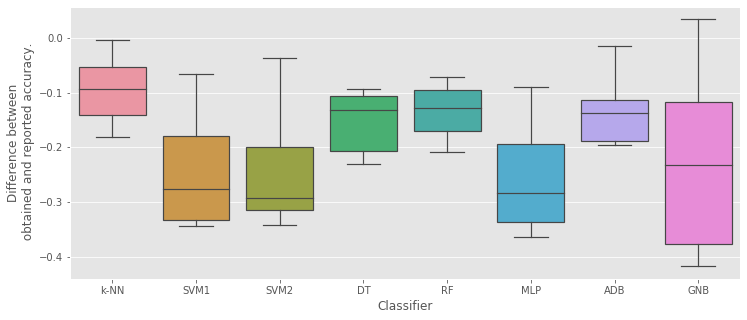

In [13]:
print("Accuracy difference between original results and our results.")

diff.columns = ["", ""]

fig, ax = plt.subplots(figsize=(12, 5))

sns.set_context("paper", font_scale=0.9)

diff.columns = ["Classifier",
                "Difference between\n obtained and reported accuracy."]

ax = sns.boxplot(data=diff, 
            y="Difference between\n obtained and reported accuracy.", 
            x="Classifier", ax=ax)



In [14]:
graph = pd.melt(merge_acc.reset_index(), id_vars=['m'])
graph.columns = ['Number of Feature - m','Classifier','Accuracy']

Features Number of autoencoder by accuracy, using linear regression.


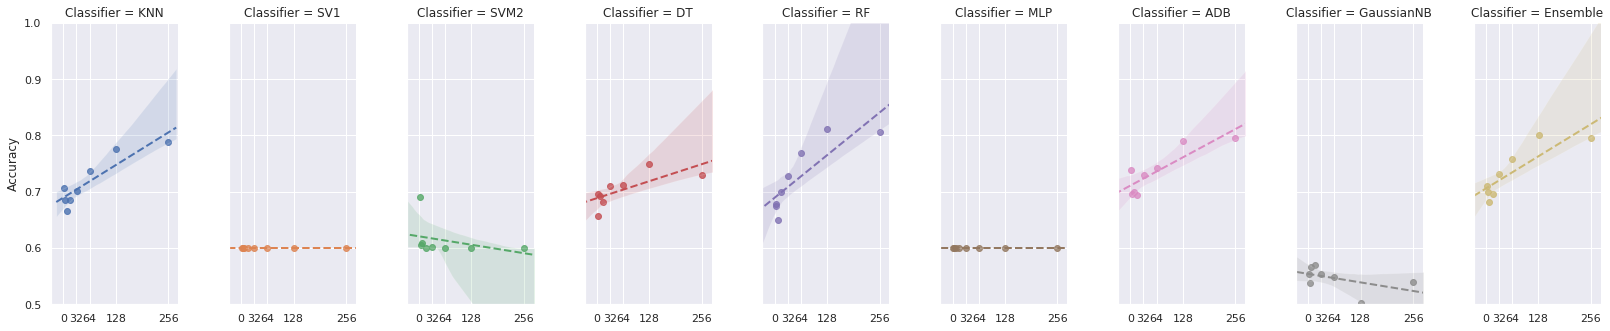

In [15]:
print("Features Number of autoencoder by accuracy, using linear regression.")

sns.set(rc={"font.style": "normal",
            "axes.facecolor": (0.9, 0.9, 0.9),
            "figure.facecolor": 'white',

            'axes.labelsize': 30,
            'figure.figsize': (20.0, 10.0),
            'xtick.labelsize': 25,
            'ytick.labelsize': 20})

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

sns.set(style="darkgrid"),

g = sns.lmplot(x="Number of Feature - m", y='Accuracy', 
               hue='Classifier', col="Classifier",
               data=graph, height=5, aspect=.5, 
               x_jitter=.1, sharex=True, line_kws={"lw": 2, 'ls': '--'})


g = g.set_axis_labels("", "Accuracy").set(xlim=(-30, 280), ylim=(0.5, 1),
                                          xticks=[0, 32, 
                                                  64, 128, 
                                                  256, 512]).fig.subplots_adjust(wspace=.4)




The Multilayer Neural Network classifier presents higher angular coefficient than the others, this increase in data volume that leads to the increase of the metric is consistent with the method premise. It is noteworthy that the Support Vector Machine with Linear Kernel has also high coefficient. The highest Linear coefficient with the lowest associated uncertainty is found in the method proposed by us, the Ensemble method presents an initial result close to the best method for $ m = 2 $.

In [23]:
from IPython.display import display, HTML

print ("\tPrecision Results of AE-CDNN-L1 for Dataset 1")
display(np.around(merge_pre,3))
print ("\tSpecificity Results of AE-CDNN-L1 for Dataset 1")
display(np.around(merge_spe,3))
print ("\tSensitivity Results of AE-CDNN-L1 for Dataset 1")
display(np.around(merge_sen,3))

	Precision Results of AE-CDNN-L1 for Dataset 1


,KNN,SV1,SVM2,DT,RF,MLP,ADB,GaussianNB,Ensemble
m,,,,,,,,,
2,0.781,0.6,0.728,0.715,0.745,0.6,0.790,0.797,0.761
4,0.750,0.6,0.608,0.763,0.746,0.6,0.753,0.668,0.737
8,0.714,0.6,0.608,0.760,0.712,0.6,0.755,0.728,0.710
16,0.775,0.6,0.600,0.729,0.764,0.6,0.741,0.796,0.727
32,0.795,0.6,0.601,0.772,0.811,0.6,0.777,0.824,0.768
64,0.843,0.6,0.600,0.749,0.843,0.6,0.790,0.841,0.787
128,0.872,0.6,0.600,0.823,0.884,0.6,0.843,1.000,0.834
256,0.881,0.6,0.600,0.776,0.888,0.6,0.829,0.806,0.846


	Specificity Results of AE-CDNN-L1 for Dataset 1


,KNN,SV1,SVM2,DT,RF,MLP,ADB,GaussianNB,Ensemble
m,,,,,,,,,
2,0.695,0.0,0.565,0.570,0.635,0.0,0.690,0.865,0.640
4,0.630,0.0,0.060,0.655,0.640,0.0,0.635,0.660,0.560
8,0.555,0.0,0.055,0.645,0.570,0.0,0.640,0.750,0.515
16,0.705,0.0,0.005,0.575,0.665,0.0,0.600,0.855,0.555
32,0.725,0.0,0.005,0.665,0.745,0.0,0.665,0.900,0.630
64,0.805,0.0,0.000,0.595,0.790,0.0,0.690,0.915,0.665
128,0.840,0.0,0.000,0.720,0.845,0.0,0.775,1.000,0.750
256,0.850,0.0,0.000,0.645,0.855,0.0,0.745,0.890,0.775


	Sensitivity Results of AE-CDNN-L1 for Dataset 1


,KNN,SV1,SVM2,DT,RF,MLP,ADB,GaussianNB,Ensemble
m,,,,,,,,,
2,0.713,1.0,0.773,0.713,0.707,1.0,0.770,0.347,0.757
4,0.723,1.0,0.970,0.723,0.697,1.0,0.737,0.457,0.793
8,0.740,1.0,0.977,0.723,0.703,1.0,0.740,0.443,0.793
16,0.673,1.0,0.997,0.753,0.723,1.0,0.757,0.380,0.790
32,0.687,1.0,1.000,0.740,0.717,1.0,0.773,0.323,0.800
64,0.690,1.0,1.000,0.790,0.753,1.0,0.777,0.303,0.820
128,0.733,1.0,1.000,0.770,0.790,1.0,0.800,0.170,0.833
256,0.747,1.0,1.000,0.787,0.773,1.0,0.830,0.307,0.810


By Table \ref{table:Precision-Specificity-Sensitivity} we realize that the most precise and specific method was the Gaussian Naive Bayesian, however, when analyzing the behavior in the Sensitivity metric, we do not have a satisfactory result. This indicates that the method pinpoints true negatives rather than true positives. If treated from a medical field, this result is worrying. The cases that the method indicates are true positives, however, this method misses many cases.

We also analyze that we cannot consider SVM-1 or MLP results with the lowest $m$. The result in specificity indicates that the method behaves unwanted, possibly indicating all values as true positives. This rule burdens the medical system because further detection of the seizure requires further investigation for a complete diagnosis of the disease.

By our method we note that the three metrics indicate that a progression in the number of features generates an improvement in seizure detection. Similar behavior is observed in K-NN, only for accuracy and sensitivity, in this case a beneficial behavior for the application. No trend was observed in the other methods. Attention is drawn to the $0$ values presented in the MLP, SVM1 methods. The average of the methods does not exceed our Ensemble method in any scenario. With the $m$ variation tested, we have that K-NN, RF, ADB worsen in specificity. Our method does not excel in these analyzed metrics.

We analyze the behavior of the F-measure in Table \ref{table:F-Measure}. The relationship between sensitivity and precision is captured by this measure, as the MLP, SVM-1, GNB methods did not obtain good results, which contradicts the accuracy result (Table \ref{table:accuracy}). The measures generally show close results with each other. Therefore, the factor to analyze here may be the complexity of the methods.


In [25]:
print("\tClassification F-Measure Results of AE-CDNN-L1 for Dataset 1")
display(np.around(merge_f1,3))

	Classification F-Measure Results of AE-CDNN-L1 for Dataset 1


,KNN,SV1,SVM2,DT,RF,MLP,ADB,GaussianNB,Ensemble
m,,,,,,,,,
2,0.743,0.75,0.750,0.712,0.725,0.75,0.779,0.481,0.758
4,0.733,0.75,0.747,0.742,0.717,0.75,0.744,0.537,0.761
8,0.725,0.75,0.749,0.737,0.707,0.75,0.747,0.547,0.749
16,0.720,0.75,0.749,0.740,0.743,0.75,0.748,0.512,0.757
32,0.734,0.75,0.751,0.754,0.759,0.75,0.775,0.462,0.783
64,0.757,0.75,0.750,0.766,0.795,0.75,0.783,0.442,0.803
128,0.795,0.75,0.750,0.784,0.834,0.75,0.820,0.284,0.833
256,0.807,0.75,0.750,0.777,0.826,0.75,0.829,0.441,0.826


According to \cite{how}, we have that the complexity of the task and the algorithms are decisive factors in deciding which methods will be used. Thus, as training is already costly, the complexity of the classification algorithm must be minimized. K-NN and ADB have a lower complexity than the others, and a result close to the champion method. The difference in the performance of the SVM2 method in F-measure with our Ensemble method is close, the difference in averages is only $0.0002$. Also, looking at the behavior of the classifiers by the Bayesian Test \cite{benavoli2017time}, we have that the Ensemble method is $52.4 \%$ better than SVM2 on Acurracy. We consider a more conservative analysis with rope = $0$ and runs= $5$, shown in Figure \ref{fig:acc-bay}.

In [ ]:
print("Probabilities using a Bayesian signed-ranks test on Accurary")
names = ("SVM2", "Ensemble")
probs, fig = two_on_multiple(
    merge_acc['SVM2'], merge_acc['Ensemble'], runs=5, plot=True, names=names)


We see in Table \ref{table:auc-roc} the performance of the AUC-ROC metric that the Ensemble method has the highest performance average, with $ 79.85 \% $, followed by K-NN with $ 76.98 \% $. The methods that stand out in this metric showed no deficiency in the Sensitivity and Specificity metrics, given the construction of the measure.


In [26]:
print("Classification AUC-ROC Results of AE-CDNN-L1 for Dataset 1")
display(np.around(merge_auc,3))

Classification AUC-ROC Results of AE-CDNN-L1 for Dataset 1


,KNN,SV1,SVM2,DT,RF,MLP,ADB,GaussianNB,Ensemble
m,,,,,,,,,
2,0.704,0.5,0.669,0.642,0.671,0.5,0.730,0.606,0.698
4,0.677,0.5,0.515,0.689,0.668,0.5,0.686,0.558,0.677
8,0.648,0.5,0.516,0.684,0.637,0.5,0.690,0.597,0.654
16,0.689,0.5,0.501,0.664,0.694,0.5,0.678,0.617,0.672
32,0.706,0.5,0.503,0.702,0.731,0.5,0.719,0.612,0.715
64,0.748,0.5,0.500,0.692,0.772,0.5,0.733,0.609,0.742
128,0.787,0.5,0.500,0.745,0.818,0.5,0.788,0.585,0.792
256,0.798,0.5,0.500,0.716,0.814,0.5,0.788,0.598,0.792


# 9. Conclusion <a name="concl"></a>

In this article, we re-implemented the approach proposed by \cite{WenZha} an investigation of the accurately tested feature sizes and proposed a new classifier. This classification approach, based on deep learning for detecting epileptic seizures using EGG, had not been explored previously. We adopted a self-concealment that allows us to construct a smaller representation space. Among the variety of metrics, our method stands out according to the ROC curve. The proposed approach still needs further investigation into the details of the parameters tested by the authors. The method is easily portable to other tasks and codes are a byproduct of this work. As future work we can employ data augmentation that would allow the method to better learn the parameters adopted.

<!--bibtex 

@Article{WenZha,
    author = {Wen, Tingxi and Zhang, Zhongnan},
    year = {2018},
    month = {05},
    pages = {1-1},
    title = {Deep Convolution Neural Network and Autoencoders-based Unsupervised Feature Learning of EEG Signals},
    volume = {PP},
    journal = {IEEE Access},
    doi = {10.1109/ACCESS.2018.2833746}
}

@Article{andrzejak,
author = {G. Andrzejak, Ralph and Lehnertz, Klaus and Mormann, Florian and Rieke, Christoph and David, Peter and Elger, Christian},
year = {2002},
month = {01},
pages = {061907},
title = {Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state},
volume = {64},
journal = {Physical review. E, Statistical, nonlinear, and soft matter physics},
doi = {10.1103/PhysRevE.64.061907}
}

@inproceedings{Shoeb,
 author = {Shoeb, Ali and Guttag, John},
 title = {Application of Machine Learning to Epileptic Seizure Detection},
 booktitle = {Proceedings of the 27th International Conference on International Conference on Machine Learning},
 series = {ICML'10},
 year = {2010},
 isbn = {978-1-60558-907-7},
 location = {Haifa, Israel},
 pages = {975--982},
 numpages = {8},
 url = {http://dl.acm.org/citation.cfm?id=3104322.3104446},
 acmid = {3104446},
 publisher = {Omnipress},
 address = {USA},
} 

@Article{how,
  title={How Complex is your classification problem? A survey on measuring classification complexity},
  author={Lorena, Ana C and Garcia, Lu{\'\i}s PF and Lehmann, Jens and Souto, Marcilio CP and Ho, Tin K},
  journal={arXiv preprint arXiv:1808.03591},
  year={2018}
}



@Article{kamath2015analysis,
  title={Analysis of EEG dynamics in epileptic patients and healthy subjects using Hilbert transform scatter plots},
  author={Kamath, Chandrakar},
  journal={Open Access Library Journal},
  volume={2},
  number={1},
  pages={1},
  year={2015},
  publisher={Scientific Research Publishing}
}


@Article{chollet2018keras,
  title={Keras: The python deep learning library},
  author={Chollet, Fran{\c{c}}ois and others},
  journal={Astrophysics Source Code Library},
  year={2018}
}

@Article{benavoli2017time,
  title={Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis},
  author={Benavoli, Alessio and Corani, Giorgio and Dem{\v{s}}ar, Janez and Zaffalon, Marco},
  journal={The Journal of Machine Learning Research},
  volume={18},
  number={1},
  pages={2653--2688},
  year={2017},
  publisher={JMLR. org}
}


@inproceedings{tensorflow,
  title={Tensorflow: A system for large-scale machine learning},
  author={Abadi, Mart{\'\i}n and Barham, Paul and Chen, Jianmin and Chen, Zhifeng and Davis, Andy and Dean, Jeffrey and Devin, Matthieu and Ghemawat, Sanjay and Irving, Geoffrey and Isard, Michael and others},
  booktitle={12th $\{$USENIX$\}$ Symposium on Operating Systems Design and Implementation ($\{$OSDI$\}$ 16)},
  pages={265--283},
  year={2016}
}


@Article{Fuente:2019,
  author = {la Fuente, Alfredo De and Aduviri, Robert},
  title = {{[Re] Variational Sparse Coding}},
  journal = {ReScience C},
  year = {2019},
  month = may,
  volume = {5},
  number = {2},
  pages = {{\#2}},
  doi = {10.5281/zenodo.3161734},
  url = {https://zenodo.org/record/3161734/files/Article.pdf},
  code_url = {https://github.com/Alfo5123/Variational-Sparse-Coding},
  code_doi = {10.5281/zenodo.2657330},
  data_url = {},
  data_doi = {},
  review_url = {https://github.com/reproducibility-challenge/iclr_2019/pull/146},
  type = {Replication},
  language = {Python},
  domain = {Machine Learning},
  keywords = {generative models, variational autoencoders, sparse coding}
}


@Article{saab2005system,
  title={A system to detect the onset of epileptic seizures in scalp EEG},
  author={Saab, ME and Gotman, Jean},
  journal={Clinical Neurophysiology},
  volume={116},
  number={2},
  pages={427--442},
  year={2005},
  publisher={Elsevier}
}


@Article{kuhlmann2009seizure,
  title={Seizure detection using seizure probability estimation: Comparison of features used to detect seizures},
  author={Kuhlmann, Levin and Burkitt, Anthony N and Cook, Mark J and Fuller, Karen and Grayden, David B and Seiderer, Linda and Mareels, Iven MY},
  journal={Annals of biomedical engineering},
  volume={37},
  number={10},
  pages={2129--2145},
  year={2009},
  publisher={Springer}
}



@Article{shoeb2004patient,
  title={Patient-specific seizure onset detection},
  author={Shoeb, Ali and Edwards, Herman and Connolly, Jack and Bourgeois, Blaise and Treves, S Ted and Guttag, John},
  journal={Epilepsy \& Behavior},
  volume={5},
  number={4},
  pages={483--498},
  year={2004},
  publisher={Elsevier}
}



@Article{shoeb2011machine,
  title={A machine-learning algorithm for detecting seizure termination in scalp EEG},
  author={Shoeb, Ali and Kharbouch, Alaa and Soegaard, Jacqueline and Schachter, Steven and Guttag, John},
  journal={Epilepsy \& Behavior},
  volume={22},
  pages={S36--S43},
  year={2011},
  publisher={Elsevier}
}


@Article{ullah2018automated,
  title={An automated system for epilepsy detection using EEG brain signals based on deep learning approach},
  author={Ullah, Ihsan and Hussain, Muhammad and Aboalsamh, Hatim and others},
  journal={Expert Systems with Applications},
  volume={107},
  pages={61--71},
  year={2018},
  publisher={Elsevier}
}

@Article{chua2011application,
  title={Application of higher order spectra to identify epileptic EEG},
  author={Chua, Kuang Chua and Chandran, Vinod and Acharya, U Rajendra and Lim, Choo Min},
  journal={Journal of medical systems},
  volume={35},
  number={6},
  pages={1563--1571},
  year={2011},
  publisher={Springer}
}

@Article{nicolaou2012detection,
  title={Detection of epileptic electroencephalogram based on permutation entropy and support vector machines},
  author={Nicolaou, Nicoletta and Georgiou, Julius},
  journal={Expert Systems with Applications},
  volume={39},
  number={1},
  pages={202--209},
  year={2012},
  publisher={Elsevier}
}


@Article{xun2016detecting,
  title={Detecting epileptic seizures with electroencephalogram via a context-learning model},
  author={Xun, Guangxu and Jia, Xiaowei and Zhang, Aidong},
  journal={BMC medical informatics and decision making},
  volume={16},
  number={2},
  pages={70},
  year={2016},
  publisher={BioMed Central}
}

@Article{acharya2018deep,
  title={Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals},
  author={Acharya, U Rajendra and Oh, Shu Lih and Hagiwara, Yuki and Tan, Jen Hong and Adeli, Hojjat},
  journal={Computers in biology and medicine},
  volume={100},
  pages={270--278},
  year={2018},
  publisher={Elsevier}
}


@Article{emami2019autoencoding,
  title={Autoencoding of long-term scalp electroencephalogram to detect epileptic seizure for diagnosis support system},
  author={Emami, Ali and Kunii, Naoto and Matsuo, Takeshi and Shinozaki, Takashi and Kawai, Kensuke and Takahashi, Hirokazu},
  journal={Computers in biology and medicine},
  year={2019},
  publisher={Elsevier}
}

@Article{hussein2018epileptic,
  title={Epileptic seizure detection: A deep learning approach},
  author={Hussein, Ramy and Palangi, Hamid and Ward, Rabab and Wang, Z Jane},
  journal={arXiv preprint arXiv:1803.09848},
  year={2018}
}

@Article{roy2019deep,
  title={Deep learning-based electroencephalography analysis: a systematic review},
  author={Roy, Yannick and Banville, Hubert and Albuquerque, Isabela and Gramfort, Alexandre and Falk, Tiago H and Faubert, Jocelyn},
  journal={Journal of neural engineering},
  year={2019},
  publisher={IOP Publishing}
}

-->

# References

